In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

In [3]:
train = datasets.MNIST('../../../datasets/pytorch/', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('../../../datasets/pytorch/', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [4]:
# Feed Forward NN
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


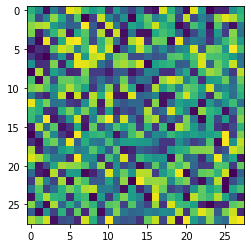

In [5]:
X = torch.rand((28, 28))

plt.imshow(X)
plt.show()

In [6]:
X = X.view(-1, 28**2)
output = net(X)
output

tensor([[-2.3728, -2.2059, -2.5056, -2.3352, -2.2441, -2.2193, -2.3472, -2.2747,
         -2.3236, -2.2339]], grad_fn=<LogSoftmaxBackward0>)

In [9]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28**2))
        loss = F.nll_loss(output, y)
        loss.backward()  # Magic function that does back-propagation
        optimizer.step()
    print(loss)

tensor(0.0146, grad_fn=<NllLossBackward0>)
tensor(0.0123, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)


In [11]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28**2))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print(f'Validation accuracy: {round(correct / total, 3)}')

Validation accuracy: 0.976


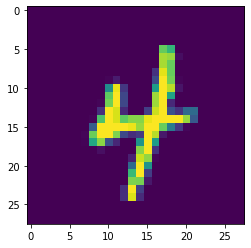

Guess: 4
Actual: 4


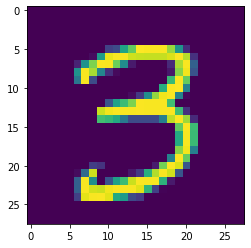

Guess: 3
Actual: 3


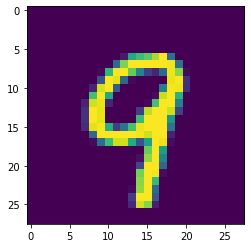

Guess: 9
Actual: 9


In [27]:
for i in range(3):
    plt.imshow(X[i].view(28, 28))
    plt.show()
    
    guess = int(torch.argmax(net(X[i].view(-1, 28**2))[0]))
    correct = int(y[i])
    
    print(f'Guess: {guess}\nActual: {correct}')